In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sqlite3    ## SQL Interface
import pickle     ## Used to save your data - Converts objects to byte stream and vice versa

from sklearn.feature_extraction.text import CountVectorizer  ## BOW Model
from sklearn.feature_extraction.text import TfidfVectorizer  ## TFIDF Model

from sklearn.manifold import TSNE    ## To visualize high dimensional data

## Modules to perform Text Preprocessing


In [3]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB


from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
conn = sqlite3.connect('mail.sqlite')

df= pd.read_sql_query("""SELECT * FROM mail""", conn)

df.head()

,level_0,index,mail,score,Cleanedmail
0,0,0,"> deat : sun , 15 dec 91 2 : 25 : 2 est > : mi...",0,deat sun dec est michael subject queri wlodek ...
1,1,1,"discussion s - > np + np remind ago read , sou...",0,discuss remind ago read sourc forget critiqu n...
2,2,2,". . . 's much restrictive s - > np np . 's "" ""...",0,much restrict pro quit
3,3,3,""" listserv "" international conference 1992 sec...",0,listserv intern confer second circular februar...
4,4,4,anyone point book article causative constructi...,0,anyon point book articl causat construct korea...


In [5]:
df.drop(['index'],axis=1,inplace=True)

In [6]:
df.head()

,level_0,mail,score,Cleanedmail
0,0,"> deat : sun , 15 dec 91 2 : 25 : 2 est > : mi...",0,deat sun dec est michael subject queri wlodek ...
1,1,"discussion s - > np + np remind ago read , sou...",0,discuss remind ago read sourc forget critiqu n...
2,2,". . . 's much restrictive s - > np np . 's "" ""...",0,much restrict pro quit
3,3,""" listserv "" international conference 1992 sec...",0,listserv intern confer second circular februar...
4,4,anyone point book article causative constructi...,0,anyon point book articl causat construct korea...


In [7]:
df.drop(['level_0'],axis=1,inplace=True)

In [8]:
df.head()

,mail,score,Cleanedmail
0,"> deat : sun , 15 dec 91 2 : 25 : 2 est > : mi...",0,deat sun dec est michael subject queri wlodek ...
1,"discussion s - > np + np remind ago read , sou...",0,discuss remind ago read sourc forget critiqu n...
2,". . . 's much restrictive s - > np np . 's "" ""...",0,much restrict pro quit
3,""" listserv "" international conference 1992 sec...",0,listserv intern confer second circular februar...
4,anyone point book article causative constructi...,0,anyon point book articl causat construct korea...


In [9]:
df.shape

(962, 3)

## Shuffling data

In [10]:
from sklearn.utils import shuffle

In [11]:
df = shuffle(df, random_state=69)
df.head()

,mail,score,Cleanedmail
371,workshop computationally-intensive methods qua...,0,workshop method quantit linguist human advanc ...
624,""" show money ! "" . . . . . . . . . . . . probl...",1,show money problem share uniqu opportun start ...
351,"shigeru kiritanus , hajime hirose hiroya fujis...",0,shigeru kiritanus hajim hiros hiroya fujisakus...
305,book list below linguist office available revi...,0,book list linguist offic avail review interest...
111,computational ling bengt sigurd ( ed ) compute...,0,comput ling bengt sigurd computer grammar anal...


# Using TF-IDF vector

In [12]:
tf_idf_vect = TfidfVectorizer()
tf_idf = tf_idf_vect.fit_transform(df['Cleanedmail'].values)
tf_idf.shape

(962, 18947)

In [13]:
X=tf_idf
y=df["score"].values

# Training and Testing

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,shuffle=False)


The optimal value of alpha is0.1


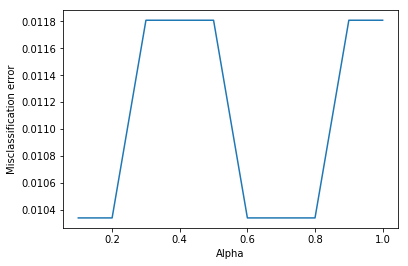

In [16]:
alpha= np.linspace(0.1,1,10)
cv_scores=[]

for a in alpha:
    clf=BernoulliNB(alpha=a)
    scores=cross_val_score(clf,X_train,y_train,cv=10,scoring='accuracy')
    cv_scores.append(scores.mean())

MSE=[1 - x for x in cv_scores]

optimal_alpha= alpha[MSE.index(min(MSE))]
print('\nThe optimal value of alpha is{}'.format(optimal_alpha))

plt.plot(alpha,MSE)
plt.xlabel('Alpha')
plt.ylabel('Misclassification error')
plt.show()
    

# Confusion matrix

In [17]:
from sklearn.metrics import confusion_matrix


In [18]:
clf=BernoulliNB(alpha=optimal_alpha)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
acc=accuracy_score(y_test,y_pred,normalize=True)*float(100)
print(acc)
confusion_matrix(y_test,y_pred).T

97.9238754325


array([[131,   2],
       [  4, 152]], dtype=int64)

In [20]:
idx=(-clf.feature_log_prob_).argsort()[:2,:50]
print("top 50 words in SPAM")
for i in idx[0]:
    print(tf_idf_vect.get_feature_names()[i])
print("\n******")
print("top 50 words in positive HAM")
for i in idx[1]:
    print(tf_idf_vect.get_feature_names()[i])

top 50 words in SPAM
linguist
languag
univers
inform
one
send
paper
includ
follow
interest
research
english
edu
address
fax
pleas
http
present
work
call
discuss
form
name
confer
refer
relat
general
develop
list
word
avail
www
number
depart
two
contact
studi
provid
email
thank
speaker
differ
page
first
write
student
area
possibl
theori
issu

******
top 50 words in positive HAM
free
mail
pleas
one
list
inform
address
receiv
remov
day
com
http
send
call
want
need
money
offer
best
name
includ
check
order
work
mani
internet
follow
servic
today
number
week
busi
site
start
email
everi
market
even
month
first
messag
state
much
subject
product
www
program
right
advertis
phone
